In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import stats
import math
pd.options.display.max_rows=200
import seaborn as sns

In [42]:
df_id_result = pd.read_csv('/data/210827_SJH_prosit/211025STRIP_PEP/massIVE-KB_result.tsv', sep='\t')
df_nid_result = pd.read_csv('/data/210827_SJH_prosit/211025STRIP_PEP/uniprot_result.tsv', sep='\t')

In [43]:
print(df_id_result.shape)
df_id_result.head(1)

(764191, 17)


,#SpecFile,SpecID,ScanNum,Title,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue
0,massIVE-KB_predMS2_frac01.mgf,index=48780,-1,"48781 File:""massIVE-KB_predMS2_frac48781.mgf"",...",HCD,1148.5422,0,0.0,3,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",218,213,3.842356e-39,1.063139e-31,0.0,0.0


In [44]:
print(df_nid_result.shape)
df_nid_result.head(1)

(1425608, 17)


,#SpecFile,SpecID,ScanNum,Title,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue
0,uniprot_predMS2_frac01.mgf,index=17130,-1,"17131 File:""uniprot_predMS2_frac17131.mgf"", Na...",HCD,1941.3418,0,0.0,2,SWEEYFEWFC+57.021QGTVLYGSWFDHIHGWMPMR,"sp|Q06520|ST2A1_HUMAN(pre=K,post=E)",258,258,5.214888e-43,1.442904e-35,0.0,0.0


In [45]:
df_id_result

,#SpecFile,SpecID,ScanNum,Title,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue
0,massIVE-KB_predMS2_frac01.mgf,index=48780,-1,"48781 File:""massIVE-KB_predMS2_frac48781.mgf"",...",HCD,1148.54220,0,0.000000,3,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",218,213,3.842356e-39,1.063139e-31,0.0,0.0
1,massIVE-KB_predMS2_frac01.mgf,index=32978,-1,"32979 File:""massIVE-KB_predMS2_frac32979.mgf"",...",HCD,984.49884,0,0.061996,3,PYFLTDGTGTVTPANASGINDGAAAVVLMK,"sp|Q9BWD1|THIC_HUMAN(pre=K,post=K)",234,234,2.212097e-38,6.120636e-31,0.0,0.0
2,massIVE-KB_predMS2_frac01.mgf,index=13137,-1,"13138 File:""massIVE-KB_predMS2_frac13138.mgf"",...",HCD,1210.22940,0,0.000000,3,EANFDINQLYDC+57.021NWVVVNC+57.021STPGNFFHVLR,"sp|Q02218|ODO1_HUMAN(pre=K,post=R);tr|E9PCR7|E...",228,221,2.386064e-38,6.601986e-31,0.0,0.0
3,massIVE-KB_predMS2_frac01.mgf,index=56663,-1,"56664 File:""massIVE-KB_predMS2_frac56664.mgf"",...",HCD,1175.17180,0,0.000000,3,NKDDEC+57.021FGDDIEEIPDTDFDFEGNLALFDK,"sp|Q96F86|EDC3_HUMAN(pre=K,post=A);tr|H3BPW9|H...",205,205,2.874954e-38,7.954693e-31,0.0,0.0
4,massIVE-KB_predMS2_frac01.mgf,index=52767,-1,"52768 File:""massIVE-KB_predMS2_frac52768.mgf"",...",HCD,1132.23180,0,0.000000,3,VLTDILNAMDIFIELVTNPDGFAFTHSMNR,"sp|Q8WXQ8|CBPA5_HUMAN(pre=R,post=L)",224,224,2.916977e-38,8.070966e-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764186,massIVE-KB_predMS2_frac12.mgf,index=31659,-1,"732287 File:""massIVE-KB_predMS2_frac732287.mgf...",HCD,449.77426,0,13.977476,4,LLKEQDRDLRAGLLR,"XXX_sp|O15417|TNC18_HUMAN(pre=R,post=E);XXX_tr...",53,6,1.140275e-06,2.888999e+01,1.0,1.0
764187,massIVE-KB_predMS2_frac12.mgf,index=55930,-1,"756558 File:""massIVE-KB_predMS2_frac756558.mgf...",HCD,536.55580,0,0.000000,3,DEDSERGDEDRER,"sp|Q8WVS4|WDR60_HUMAN(pre=K,post=R)",69,5,1.146862e-06,2.861006e+01,1.0,1.0
764188,massIVE-KB_predMS2_frac12.mgf,index=43754,-1,"744382 File:""massIVE-KB_predMS2_frac744382.mgf...",HCD,562.25555,0,0.108554,4,AFSEGEQEKC+57.021GSETHHTRR,"sp|Q7Z333|SETX_HUMAN(pre=R,post=N);tr|X6RI79|X...",57,-1,1.308308e-06,3.405666e+01,1.0,1.0
764189,massIVE-KB_predMS2_frac12.mgf,index=23896,-1,"724524 File:""massIVE-KB_predMS2_frac724524.mgf...",HCD,668.54700,0,-19.080340,4,QVHTGEKPYGC+57.021NEC+57.021GKGFTMKSR,"sp|O94892|ZN432_HUMAN(pre=K,post=L)",137,-3,2.247193e-06,5.990828e+01,1.0,1.0


In [46]:
df_id_result['Peptide'] = df_id_result.Peptide.apply(lambda x: x.replace('C+57.021', 'C'))
df_nid_result['Peptide'] = df_nid_result.Peptide.apply(lambda x: x.replace('C+57.021', 'C'))

* FDR control

In [50]:
def isDecoy(prot):
    prot_cnt = len(prot.split(';'))
    decoy_cnt = 0
    for p in prot.split(';'):
        if 'XXX' in p:
            decoy_cnt += 1
    if decoy_cnt == prot_cnt:
        return 'D'
    else:
        return 'T'

In [51]:
def getFDR(TD_list):
    start = time.time()
    
    FDR_list = []
    T_cnt = 0
    D_cnt = 0
    cut_idx = 0
    
    for idx, label in enumerate(TD_list):
        if label=='T':
            T_cnt += 1
        elif label == 'D':
            D_cnt += 1
        fdr = round((2*D_cnt) / (T_cnt + D_cnt), 2)
        if fdr <= 0.01:
            cut_idx = idx
    return cut_idx

In [52]:
def FDR_control(df, PERCENT):
    df_ = df.sort_values('SpecEValue').reset_index(drop=True)  # copy
    df_['TD_label'] = df_.Protein.apply(isDecoy).values
    print('********** Target Decoy Labelling Done **********')
    cut_idx = getFDR(df_.TD_label.values)  
    print('********** Calculating FDR Done **********')
    df_ = df_.iloc[:cut_idx+1].reset_index(drop=True)
    df_ = df_.loc[df_.TD_label=='T'].reset_index(drop=True)
    return df_

In [53]:
df_id_target = FDR_control(df_id_result, 0.01)

********** Target Decoy Labelling Done **********
********** Calculating FDR Done **********


In [54]:
df_nid_target = FDR_control(df_nid_result, 0.01)

********** Target Decoy Labelling Done **********
********** Calculating FDR Done **********


In [55]:
max(df_id_target.EValue.values), min(df_id_target.EValue.values)  # maaIVE-KB

(127.47247, 1.5074339925461614e-33)

In [56]:
max(df_nid_target.EValue.values), min(df_nid_target.EValue.values)  # uniprot

(205.59102, 1.442904175876456e-35)

* decoy protien identificatin count

In [57]:
from matplotlib_venn import venn2, venn2_circles

nonDetection Peptide set : 2579
intersection cnt : 17
Detection Peptide set : 134
whole cnt : 2696



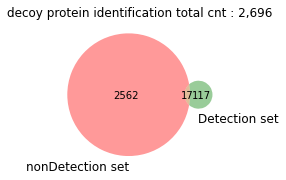

In [58]:
nid_proteins = {__.split('(')[0] for _ in df_nid_target.Protein.values for __ in _.split(';') if 'XXX' in __}
id_proteins = {__.split('(')[0] for _ in df_id_target.Protein.values for __ in _.split(';') if 'XXX' in __}

print('nonDetection Peptide set : {}\n\
intersection cnt : {}\n\
Detection Peptide set : {}\n\
whole cnt : {}\n'.format(len(nid_proteins),
         len(nid_proteins.intersection(id_proteins)),
         len(id_proteins),
         len(nid_proteins.union(id_proteins))))

plt.figure(figsize=(3, 3))
v = venn2(subsets=[nid_proteins, id_proteins], set_labels=('nonDetection set', 'Detection set'))
plt.title('decoy protein identification total cnt : {:,}'.format(len(nid_proteins.union(id_proteins))))
plt.show()

In [59]:
df_id_target_removeDecoy = df_id_target.copy()
df_nid_target_removeDecoy = df_nid_target.copy()

p = []
for prot in df_id_target_removeDecoy.Protein.values:
    p.append(';'.join([_ for _ in prot.split(';') if 'XXX' not in _]))
df_id_target_removeDecoy['Protein'] = p
df_id_target_removeDecoy = df_id_target_removeDecoy.loc[df_id_target_removeDecoy.Protein!='']
p = []
for prot in df_nid_target_removeDecoy.Protein.values:
    p.append(';'.join([_ for _ in prot.split(';') if 'XXX' not in _]))
df_nid_target_removeDecoy['Protein'] = p
df_nid_target_removeDecoy = df_nid_target_removeDecoy.loc[df_nid_target_removeDecoy.Protein!='']

In [60]:
unique_idx = np.where(df_id_target_removeDecoy.Protein.apply(lambda x: ';' not in x))[0]
shared_idx = np.where(df_id_target_removeDecoy.Protein.apply(lambda x: ';' in x))[0]
unique_cnt = len(df_id_target_removeDecoy.loc[unique_idx].Peptide.unique())
shared_cnt = len(df_id_target_removeDecoy.loc[shared_idx].Peptide.unique())
protein_nonMutate = {__.split('(')[0] for _ in df_id_target_removeDecoy.Protein.values for __ in _.split(';')}

print("총 PSM 수 :", len(df_id_target_removeDecoy))
print("펩타이드 수 :", len(df_id_target_removeDecoy.Peptide.unique()))
print('Unique 펩타이드 수 :', unique_cnt)
print('Shared 펩타이드 수 :', shared_cnt)
print('단백질 수 :', len(protein_nonMutate))

unique_idx = np.where(df_nid_target_removeDecoy.Protein.apply(lambda x: ';' not in x))[0]
shared_idx = np.where(df_nid_target_removeDecoy.Protein.apply(lambda x: ';' in x))[0]
unique_cnt = len(df_nid_target_removeDecoy.loc[unique_idx].Peptide.unique())
shared_cnt = len(df_nid_target_removeDecoy.loc[shared_idx].Peptide.unique())
protein_nonMutate = {__.split('(')[0] for _ in df_nid_target_removeDecoy.Protein.values for __ in _.split(';')}

print("총 PSM 수 :", len(df_nid_target_removeDecoy))
print("펩타이드 수 :", len(df_nid_target_removeDecoy.Peptide.unique()))
print('Unique 펩타이드 수 :', unique_cnt)
print('Shared 펩타이드 수 :', shared_cnt)
print('단백질 수 :', len(protein_nonMutate))

총 PSM 수 : 762999
펩타이드 수 : 455968
Unique 펩타이드 수 : 204222
Shared 펩타이드 수 : 251746
단백질 수 : 63986
총 PSM 수 : 1422276
펩타이드 수 : 1416189
Unique 펩타이드 수 : 676862
Shared 펩타이드 수 : 739327
단백질 수 : 67120


* Protein identification count

In [61]:
nid_proteins = {__.split('(')[0] for _ in df_nid_target.Protein.values for __ in _.split(';') if 'XXX' not in __}
id_proteins = {__.split('(')[0] for _ in df_id_target.Protein.values for __ in _.split(';') if 'XXX' not in __}

print('nonDetection Peptide set : {}\n\
intersection cnt : {}\n\
Detection Peptide set : {}\n\
whole cnt : {}\n'.format(len(nid_proteins),
         len(nid_proteins.intersection(id_proteins)),
         len(id_proteins),
         len(nid_proteins.union(id_proteins))))

nonDetection Peptide set : 67120
intersection cnt : 62585
Detection Peptide set : 63986
whole cnt : 68521



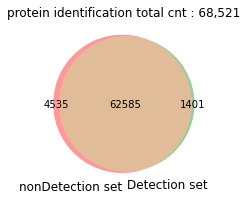

In [62]:
plt.figure(figsize=(3, 3))
v = venn2(subsets=[nid_proteins, id_proteins], set_labels=('nonDetection set', 'Detection set'))
plt.title('protein identification total cnt : {:,}'.format(len(nid_proteins.union(id_proteins))))
plt.show()

* Peptide idenfication count

In [63]:
id_precursors = {(k, v) for k, v in filter(lambda x: '+' not in x[0], df_id_target_removeDecoy[['Peptide', 'Charge']].values)}
nid_precursors = {(k, v) for k, v in filter(lambda x: '+' not in x[0], df_nid_target_removeDecoy[['Peptide', 'Charge']].values)}

print('nonDetection Peptide set : {:,}\n\
intersection cnt : {:,}\n\
Detection Peptide set : {:,}\n\
whole cnt : {:,}\n'.format(len(nid_precursors),
         len(nid_precursors.intersection(id_precursors)),
         len(id_precursors),
         len(nid_precursors.union(id_precursors))))

nonDetection Peptide set : 1,416,189
intersection cnt : 518
Detection Peptide set : 762,812
whole cnt : 2,178,483



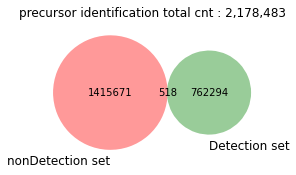

In [64]:
plt.figure(figsize=(4, 4))
v = venn2(subsets=[nid_precursors, id_precursors], set_labels=('nonDetection set', 'Detection set'))
plt.title('precursor identification total cnt : {:,}'.format(len(nid_precursors.union(id_precursors))))
plt.show()

nonDetection Peptide set : 1,416,189
intersection cnt : 1,074
Detection Peptide set : 455,968
whole cnt : 1,871,083



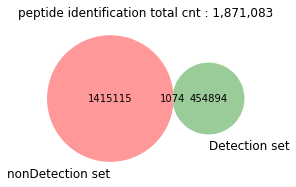

In [65]:
id_peptides = {k for k, v in filter(lambda x: '+' not in x[0], df_id_target_removeDecoy[['Peptide', 'Charge']].values)}
nid_peptides = {k for k, v in filter(lambda x: '+' not in x[0], df_nid_target_removeDecoy[['Peptide', 'Charge']].values)}

print('nonDetection Peptide set : {:,}\n\
intersection cnt : {:,}\n\
Detection Peptide set : {:,}\n\
whole cnt : {:,}\n'.format(len(nid_peptides),
         len(nid_peptides.intersection(id_peptides)),
         len(id_peptides),
         len(nid_peptides.union(id_peptides))))

plt.figure(figsize=(4, 4))
v = venn2(subsets=[nid_peptides, id_peptides], set_labels=('nonDetection set', 'Detection set'))
plt.title('peptide identification total cnt : {:,}'.format(len(nid_peptides.union(id_peptides))))
plt.show()

* MSGFscore violin plot

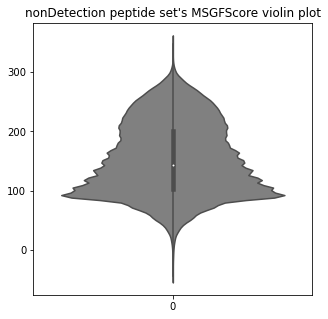

In [66]:
plt.figure(figsize=(5,5))
sns.violinplot(data=df_nid_target_removeDecoy.MSGFScore.values, color='gray')
plt.title('nonDetection peptide set\'s MSGFScore violin plot')
plt.show()

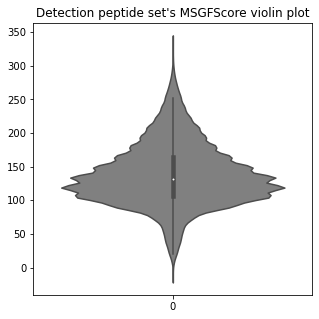

In [67]:
plt.figure(figsize=(5,5))
sns.violinplot(data=df_id_target_removeDecoy.MSGFScore.values, color='gray')
plt.title('Detection peptide set\'s MSGFScore violin plot')
plt.show()

In [68]:
df_nonid = pd.DataFrame([[_, 'nonID', 'score'] for _ in df_nid_target_removeDecoy.MSGFScore.values],
                        columns=['MSGFScore', 'label', 'score'])
df_id = pd.DataFrame([[_, 'ID', 'score'] for _ in df_id_target_removeDecoy.MSGFScore.values],
                     columns=['MSGFScore', 'label', 'score'])

df_MSGFScore = pd.concat([df_nonid, df_id], axis=0).reset_index(drop=True)

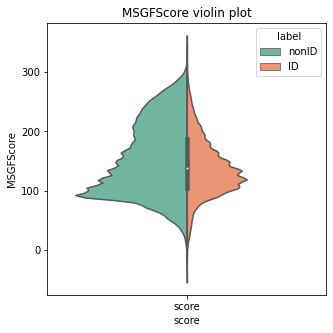

In [69]:
plt.figure(figsize=(5,5))
sns.violinplot(x='score', y="MSGFScore", hue="label",
                    data=df_MSGFScore, 
                    palette="Set2",
                    split=True,
                    scale="count"
                   )
plt.title('MSGFScore violin plot')
plt.show()

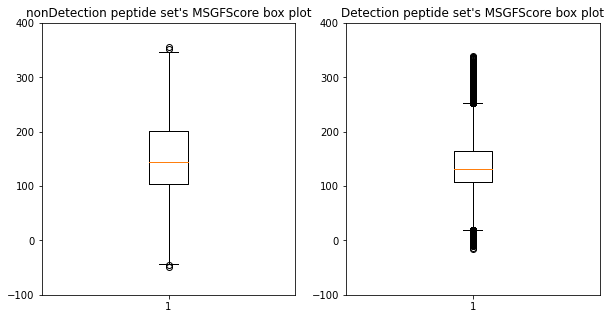

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
ax[0].boxplot(df_nid_target_removeDecoy.MSGFScore.values)
ax[1].boxplot(df_id_target_removeDecoy.MSGFScore.values)

ax[0].set_ylim(-100, 400)
ax[1].set_ylim(-100, 400)
ax[0].set_title('nonDetection peptide set\'s MSGFScore box plot')
ax[1].set_title('Detection peptide set\'s MSGFScore box plot')

plt.show()

# 3d plotting

In [464]:
df_id_target

,#SpecFile,SpecID,ScanNum,Title,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue,TD_label
0,massIVE-KB_predMS2_frac08.mgf,index=37341,-1,"483195 File:""massIVE-KB_predMS2_frac483195.mgf...",HCD,1246.19480,0,0.000000,3,LEITNCFPFPQHTEDDADFDEVQYQMEMMR,"sp|O15372|EIF3H_HUMAN(pre=R,post=S);tr|E5RGU4|...",226,226,5.448110e-41,1.507434e-33,0.0,0.0,T
1,massIVE-KB_predMS2_frac02.mgf,index=51968,-1,"115662 File:""massIVE-KB_predMS2_frac115662.mgf...",HCD,1247.84990,0,-0.097825,3,DNEVDFQEYCVFLSCIAMMCNEFFEGFPDK,"sp|P26447|S10A4_HUMAN(pre=R,post=Q)",210,209,8.602959e-41,2.380347e-33,0.0,0.0,T
2,massIVE-KB_predMS2_frac09.mgf,index=4205,-1,"513753 File:""massIVE-KB_predMS2_frac513753.mgf...",HCD,1162.16900,0,-0.105037,3,MRNPWGEVEWTGAWSDSSSEWNNVDPYER,"sp|P07384|CAN1_HUMAN(pre=R,post=D)",223,223,1.551174e-40,4.270348e-33,0.0,0.0,T
3,massIVE-KB_predMS2_frac12.mgf,index=44116,-1,"744744 File:""massIVE-KB_predMS2_frac744744.mgf...",HCD,1142.17970,0,0.000000,3,NPTDEYLDAMMNEAPGPINFTMFLTMFGEK,"sp|P19105|ML12A_HUMAN(pre=K,post=L);tr|J3QRS3|...",207,207,1.664983e-40,4.606831e-33,0.0,0.0,T
4,massIVE-KB_predMS2_frac10.mgf,index=45241,-1,"618482 File:""massIVE-KB_predMS2_frac618482.mgf...",HCD,1192.85250,0,0.000000,3,CDPVDQCQDSETGTFYQIGDSWEKYVHGVR,"sp|P02751|FINC_HUMAN(pre=K,post=Y)",186,185,5.155587e-40,1.426496e-32,0.0,0.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762994,massIVE-KB_predMS2_frac07.mgf,index=33365,-1,"415526 File:""massIVE-KB_predMS2_frac415526.mgf...",HCD,458.53207,1,9.290730,4,RLLSWKQQVQKLFR,"sp|Q9UPU9|SMAG1_HUMAN(pre=K,post=S);tr|G3V2R1|...",49,3,2.463573e-06,6.194967e+01,1.0,1.0,T
762995,massIVE-KB_predMS2_frac07.mgf,index=33365,-1,"415526 File:""massIVE-KB_predMS2_frac415526.mgf...",HCD,458.53207,1,5.961111,4,ILILIMKVNFDILER,"tr|F2Z341|F2Z341_HUMAN(pre=K,post=E)",49,3,2.463573e-06,6.241707e+01,1.0,1.0,T
762996,massIVE-KB_predMS2_frac07.mgf,index=33365,-1,"415526 File:""massIVE-KB_predMS2_frac415526.mgf...",HCD,458.53207,0,0.000000,4,AVVLAGFGGLNKLRLFR,"sp|Q9HCJ6|VAT1L_HUMAN(pre=R,post=K)",49,3,2.463573e-06,6.330047e+01,1.0,1.0,T
762997,massIVE-KB_predMS2_frac02.mgf,index=40907,-1,"104601 File:""massIVE-KB_predMS2_frac104601.mgf...",HCD,653.61720,0,0.000000,3,ADNAEEGGPGAGGGGCRGVDR,"sp|P34130|NTF4_HUMAN(pre=K,post=R)",88,4,3.177677e-06,8.373589e+01,1.0,1.0,T


In [71]:
df_id_2d = pd.DataFrame([[len(p), m, 'ID', 'score'] for p, m in df_id_target[['Peptide', 'MSGFScore']].values],
                        columns=['PeptideLength', 'MSGFScore', 'Label', 'score'])
df_nonid_2d = pd.DataFrame([[len(p), m, 'nonID', 'score'] for p, m in df_nid_target[['Peptide', 'MSGFScore']].values],
                        columns=['PeptideLength', 'MSGFScore', 'Label', 'score'])

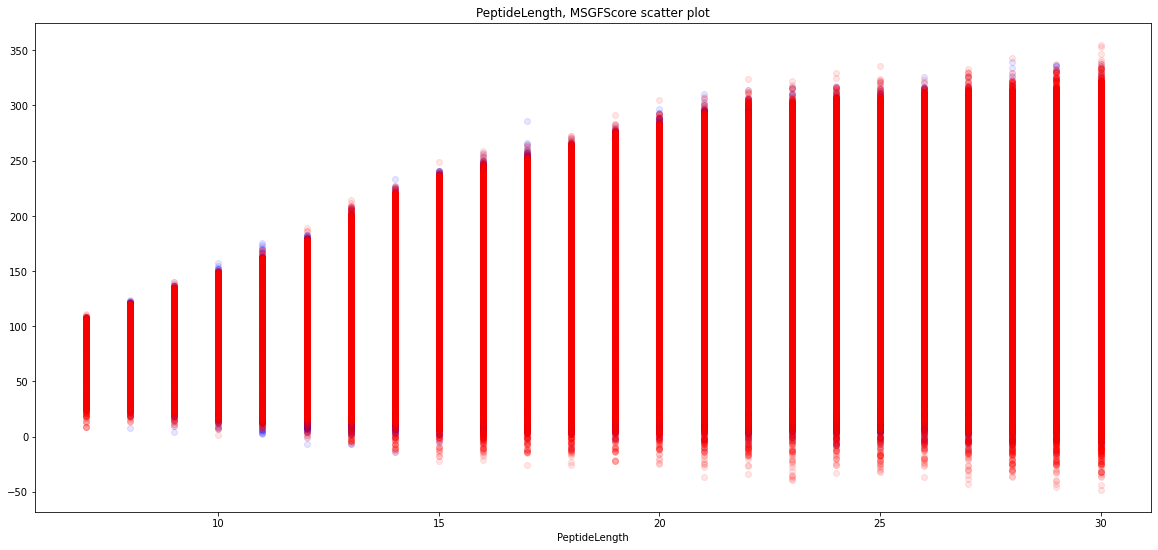

In [72]:
plt.figure(figsize=(20,9))

p = df_id_2d.sort_values('PeptideLength').PeptideLength.values
m = df_id_2d.sort_values('PeptideLength').MSGFScore.values
plt.scatter(p, m, alpha = 0.1, color='blue', label='ID')
p = df_nonid_2d.sort_values('PeptideLength').PeptideLength.values
m = df_nonid_2d.sort_values('PeptideLength').MSGFScore.values
plt.scatter(p, m, alpha = 0.1, color='red', label='nonID')

plt.title('PeptideLength, MSGFScore scatter plot')
plt.xlabel('PeptideLength')
plt.show()

In [73]:
df_nonid_2d.tail(2)

,PeptideLength,MSGFScore,Label,score
1422274,7,14,nonID,score
1422275,7,9,nonID,score


In [74]:
print('id min max : ', min(df_id_2d.MSGFScore.values), max(df_id_2d.MSGFScore.values), 
      '\nnid min max : ', min(df_nonid_2d.MSGFScore.values), max(df_nonid_2d.MSGFScore.values))

id min max :  -16 339 
nid min max :  -48 355


In [104]:
# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_id_2d[['PeptideLength', 'MSGFScore']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_id_3d = pd.DataFrame([[p, m, f, 'ID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'MSGFScore', 'Frequency', 'Label'])

# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_nonid_2d[['PeptideLength', 'MSGFScore']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_nonid_3d = pd.DataFrame([[p, m, f, 'nonID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'MSGFScore', 'Frequency', 'Label'])

In [105]:
%matplotlib notebook

<IPython.core.display.Javascript object>


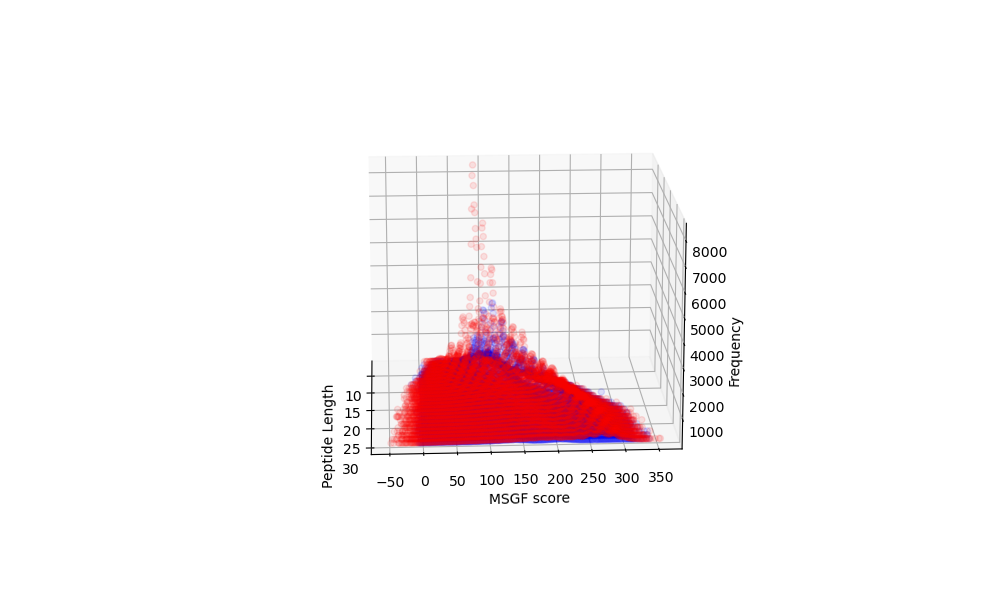

In [106]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = df_nonid_3d.PeptideLength.values
y = df_nonid_3d.MSGFScore.values
z = df_nonid_3d.Frequency.values
ax.scatter(x, y, z, alpha = 0.1, color='red')
x2 = df_id_3d.PeptideLength.values
y2 = df_id_3d.MSGFScore.values
z2 = df_id_3d.Frequency.values
ax.scatter(x2, y2, z2, alpha = 0.1, color='blue')

ax.set_zlim(1,8500)
ax.set_xlabel('Peptide Length')
ax.set_ylabel('MSGF score')
ax.set_zlabel('Frequency')
plt.show()

In [128]:
%matplotlib inline

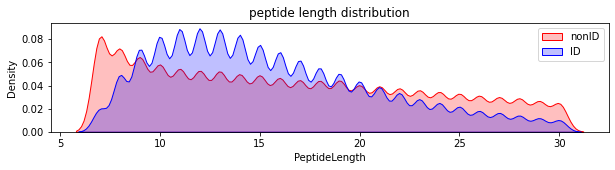

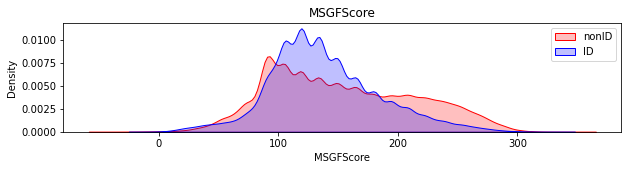

In [111]:
plt.figure(figsize=(10,2))
sns.kdeplot(df_nonid_2d.PeptideLength, shade=True, color='red')

sns.kdeplot(df_id_2d.PeptideLength, shade=True, color='blue')
plt.legend(['nonID', 'ID'])
plt.title('peptide length distribution')
plt.show()

plt.figure(figsize=(10,2))
sns.kdeplot(df_nonid_2d.MSGFScore, shade=True, color='red')

sns.kdeplot(df_id_2d.MSGFScore, shade=True, color='blue')
plt.legend(['nonID', 'ID'])
plt.title('MSGFScore')
plt.show()

# nofdr

In [88]:
df_id_result['TD'] = df_id_result.Protein.apply(isDecoy)
df_nid_result['TD'] = df_nid_result.Protein.apply(isDecoy)

df_id_T = df_id_result.loc[df_id_result.TD=='T'].reset_index(drop=True)
df_nid_T = df_nid_result.loc[df_nid_result.TD=='T'].reset_index(drop=True)

In [121]:
print(max(df_id_T.EValue.values), 
      min(df_id_T.EValue.values),  # maaIVE-KB
      max(df_nid_T.EValue.values), 
      min(df_nid_T.EValue.values))  # uniprot

127.47247 1.5074339925461614e-33 205.59102 1.442904175876456e-35


In [112]:
df_id_2d_T = pd.DataFrame([[len(p), m, se, e, 'ID', 'score'] 
                               for p, m, se, e in df_id_T[['Peptide', 'MSGFScore', 'SpecEValue', 'EValue']].values],
                        columns=['PeptideLength', 'MSGFScore', 'SpecEValue', 'EValue', 'Label', 'score'])
df_nonid_2d_T = pd.DataFrame([[len(p), m, se, e, 'nonID', 'score'] 
                               for p, m, se, e in df_nid_T[['Peptide', 'MSGFScore', 'SpecEValue', 'EValue']].values],
                        columns=['PeptideLength', 'MSGFScore', 'SpecEValue', 'EValue', 'Label', 'score'])

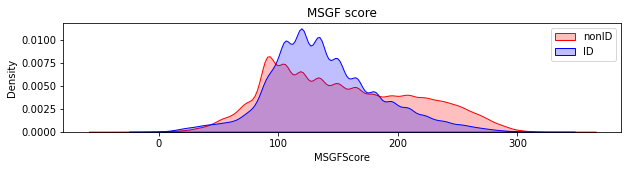

In [113]:
plt.figure(figsize=(10,2))
sns.kdeplot(df_nonid_2d_T.MSGFScore, shade=True, color='red')

sns.kdeplot(df_id_2d_T.MSGFScore, shade=True, color='blue')
plt.legend(['nonID', 'ID'])
plt.title('MSGF score')
plt.show()

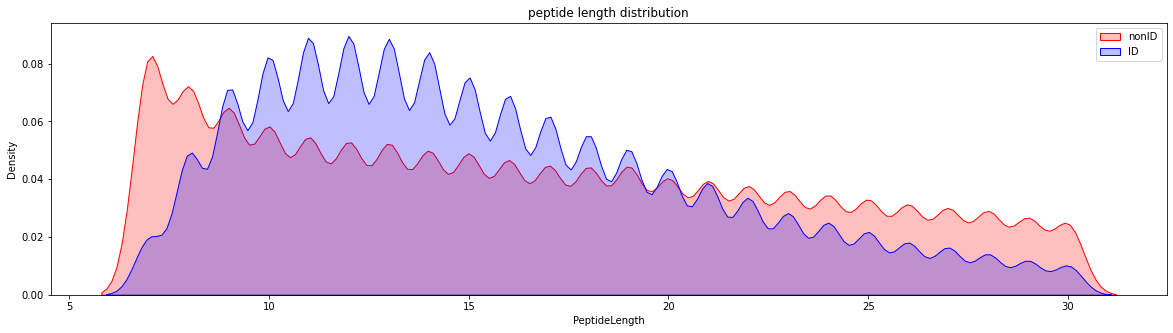

In [114]:
plt.figure(figsize=(20,5))
sns.kdeplot(df_nonid_2d_T.PeptideLength, shade=True, color='red')

sns.kdeplot(df_id_2d_T.PeptideLength, shade=True, color='blue')
plt.legend(['nonID', 'ID'])
plt.title('peptide length distribution')
plt.show()

In [126]:
df_nonid_2d_T['SpecEValue_log'] = df_nonid_2d_T.SpecEValue.apply(lambda x: -math.log(x))
df_id_2d_T['SpecEValue_log'] = df_id_2d_T.SpecEValue.apply(lambda x: -math.log(x))

<IPython.core.display.Javascript object>


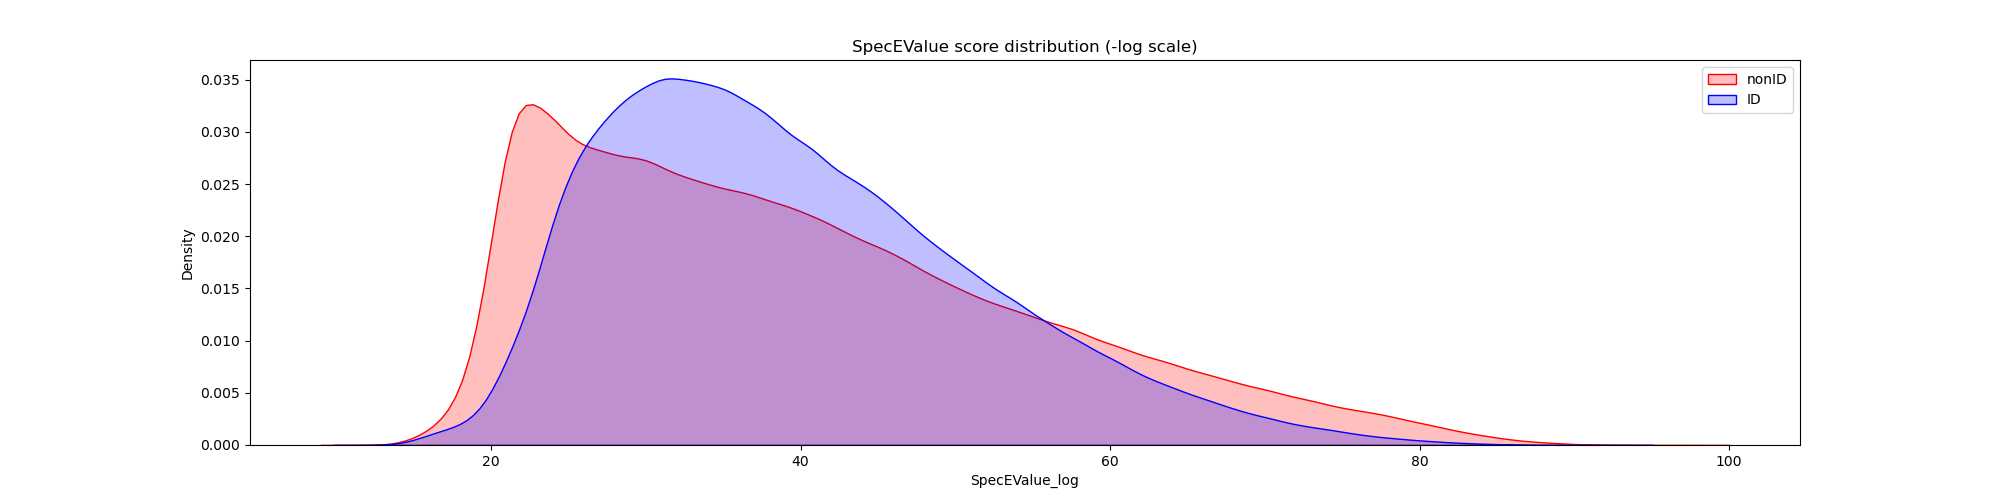

In [127]:
plt.figure(figsize=(20,5))
sns.kdeplot(df_nonid_2d_T.SpecEValue_log, shade=True, color='red')

sns.kdeplot(df_id_2d_T.SpecEValue_log, shade=True, color='blue')
plt.legend(['nonID', 'ID'])
plt.title('SpecEValue score distribution (-log scale)')
plt.show()

In [129]:
df_nonid_2d_T['EValue_log'] = df_nonid_2d_T.EValue.apply(lambda x: -math.log(x))
df_id_2d_T['EValue_log'] = df_id_2d_T.EValue.apply(lambda x: -math.log(x))

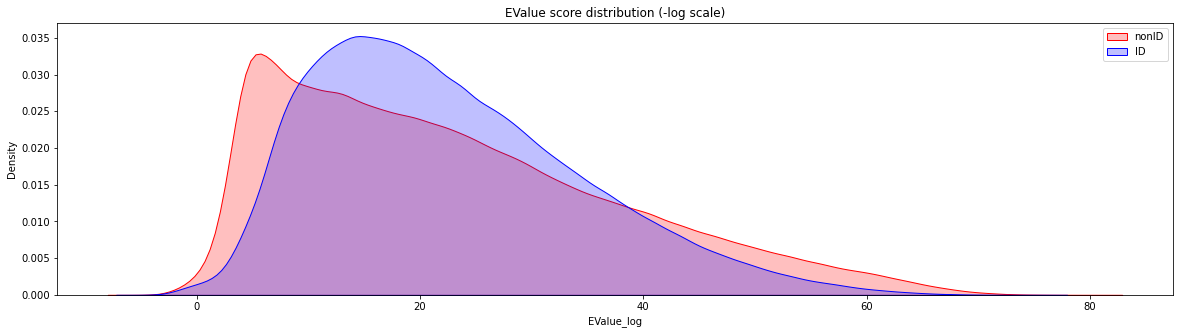

In [130]:
plt.figure(figsize=(20,5))
sns.kdeplot(df_nonid_2d_T.EValue_log, shade=True, color='red')

sns.kdeplot(df_id_2d_T.EValue_log, shade=True, color='blue')
plt.legend(['nonID', 'ID'])
plt.title('EValue score distribution (-log scale)')
plt.show()

In [117]:
print('id min max : ', min(df_id_2d_T.MSGFScore.values), max(df_id_2d_T.MSGFScore.values), 
      '\nnid min max : ', min(df_nonid_2d_T.MSGFScore.values), max(df_nonid_2d_T.MSGFScore.values))

id min max :  -16 339 
nid min max :  -48 355


In [131]:
# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_id_2d_T[['PeptideLength', 'MSGFScore']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_id_3d_T_MSGF = pd.DataFrame([[p, m, f, 'ID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'MSGFScore', 'Frequency', 'Label'])

# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_nonid_2d_T[['PeptideLength', 'MSGFScore']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_nonid_3d_T_MSGF = pd.DataFrame([[p, m, f, 'nonID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'MSGFScore', 'Frequency', 'Label'])

In [132]:
%matplotlib notebook

<IPython.core.display.Javascript object>


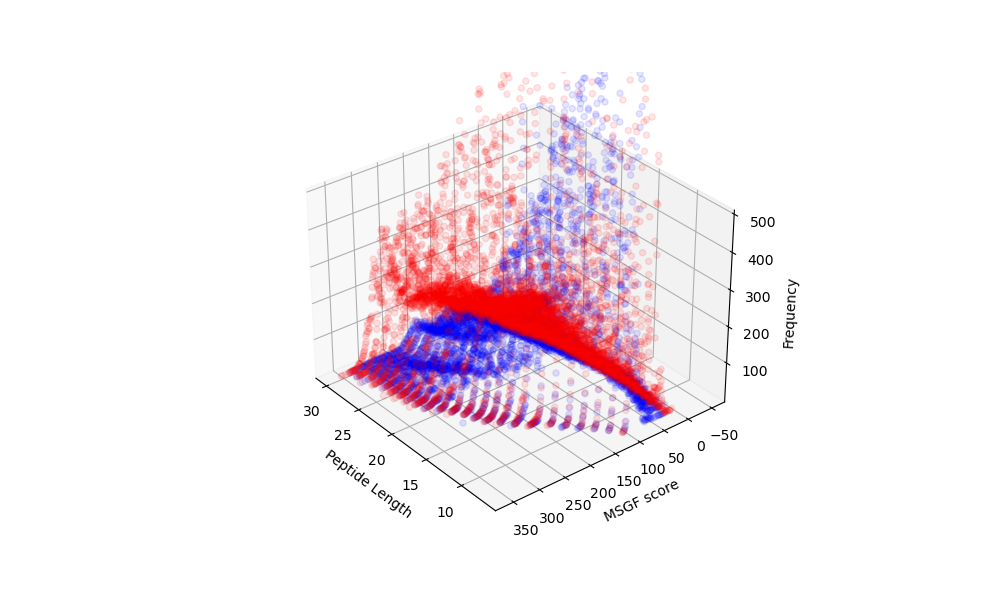

In [134]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = df_nonid_3d_T_MSGF.PeptideLength.values
y = df_nonid_3d_T_MSGF.MSGFScore.values
z = df_nonid_3d_T_MSGF.Frequency.values
ax.scatter(x, y, z, alpha = 0.1, color='red')
x2 = df_id_3d_T_MSGF.PeptideLength.values
y2 = df_id_3d_T_MSGF.MSGFScore.values
z2 = df_id_3d_T_MSGF.Frequency.values
ax.scatter(x2, y2, z2, alpha = 0.1, color='blue')

ax.set_zlim(1,500)
ax.set_xlabel('Peptide Length')
ax.set_ylabel('MSGF score')
ax.set_zlabel('Frequency')
plt.show()

In [144]:
df_id_2d_T['SpecEValue_logint'] = df_id_2d_T.SpecEValue_log.apply(lambda x: int(x))
df_nonid_2d_T['SpecEValue_logint'] = df_nonid_2d_T.SpecEValue_log.apply(lambda x: int(x))

In [145]:
# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_id_2d_T[['PeptideLength', 'SpecEValue_logint']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_id_3d_T_SpecEValue = pd.DataFrame([[p, m, f, 'ID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'SpecEValue', 'Frequency', 'Label'])

# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_nonid_2d_T[['PeptideLength', 'SpecEValue_logint']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_nonid_3d_T_SpecEValue = pd.DataFrame([[p, m, f, 'nonID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'SpecEValue', 'Frequency', 'Label'])

<IPython.core.display.Javascript object>


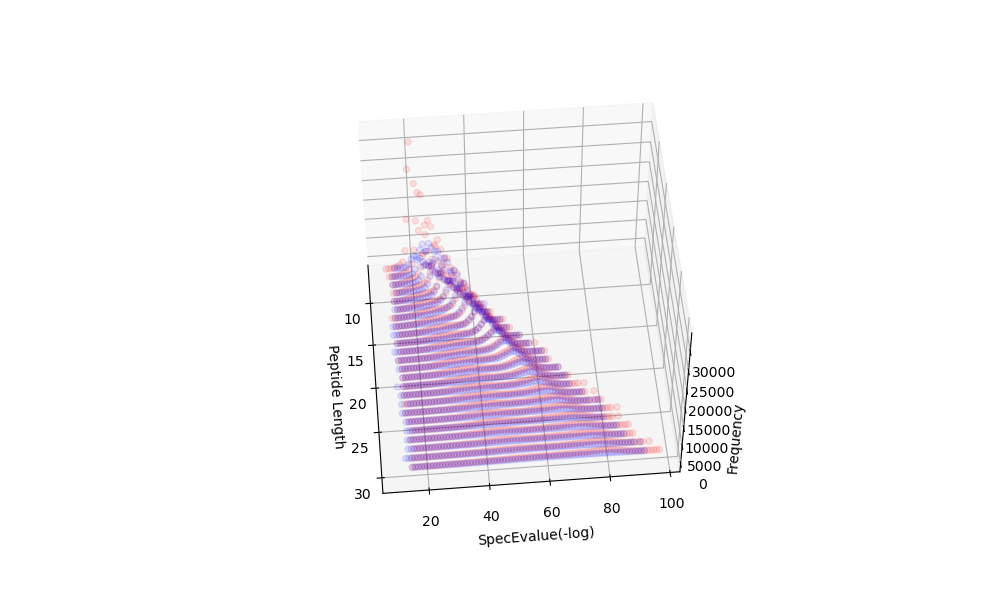

In [147]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = df_nonid_3d_T_SpecEValue.PeptideLength.values
y = df_nonid_3d_T_SpecEValue.SpecEValue.values
z = df_nonid_3d_T_SpecEValue.Frequency.values
ax.scatter(x, y, z, alpha = 0.1, color='red')
x2 = df_id_3d_T_SpecEValue.PeptideLength.values
y2 = df_id_3d_T_SpecEValue.SpecEValue.values
z2 = df_id_3d_T_SpecEValue.Frequency.values
ax.scatter(x2, y2, z2, alpha = 0.1, color='blue')

# ax.set_zlim(1,500)
ax.set_xlabel('Peptide Length')
ax.set_ylabel('SpecEvalue(-log)')
ax.set_zlabel('Frequency')
plt.show()

In [148]:
df_id_2d_T['EValue_logint'] = df_id_2d_T.EValue_log.apply(lambda x: int(x))
df_nonid_2d_T['EValue_logint'] = df_nonid_2d_T.EValue_log.apply(lambda x: int(x))

In [149]:
# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_id_2d_T[['PeptideLength', 'EValue_logint']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_id_3d_T_EValue = pd.DataFrame([[p, m, f, 'ID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'EValue', 'Frequency', 'Label'])

# lenscore2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
lenscore2freq = dict()
for p, m in df_nonid_2d_T[['PeptideLength', 'EValue_logint']].values:
    if (p, m) not in lenscore2freq:
        lenscore2freq[(p, m)] = 0
    lenscore2freq[(p, m)] += 1
df_nonid_3d_T_EValue = pd.DataFrame([[p, m, f, 'nonID'] for (p, m), f in lenscore2freq.items()],
                              columns=['PeptideLength', 'EValue', 'Frequency', 'Label'])

<IPython.core.display.Javascript object>


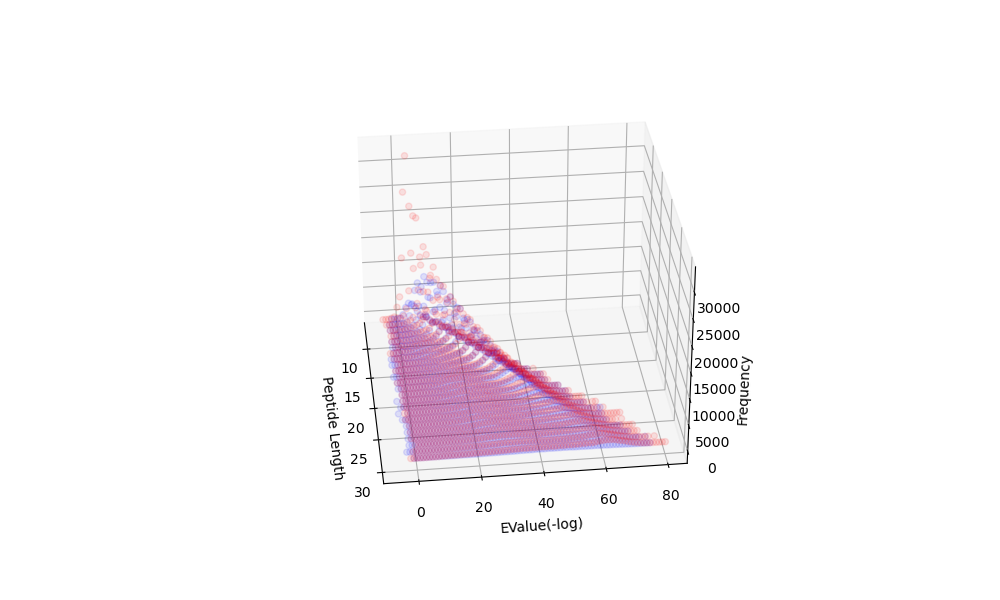

In [151]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = df_nonid_3d_T_EValue.PeptideLength.values
y = df_nonid_3d_T_EValue.EValue.values
z = df_nonid_3d_T_EValue.Frequency.values
ax.scatter(x, y, z, alpha = 0.1, color='red')
x2 = df_id_3d_T_EValue.PeptideLength.values
y2 = df_id_3d_T_EValue.EValue.values
z2 = df_id_3d_T_EValue.Frequency.values
ax.scatter(x2, y2, z2, alpha = 0.1, color='blue')

# ax.set_zlim(1,500)
ax.set_xlabel('Peptide Length')
ax.set_ylabel('EValue(-log)')
ax.set_zlabel('Frequency')
plt.show()

# specqual

In [157]:
import pickle

with open('../data/massIVE-KB/211025_stirp_pep2spec_pred.pickle', 'rb') as f:
    pep2spec_pred = pickle.load(f)
with open('../data/uniprot/211025_strip_npep2spec_pred.pickle', 'rb') as f:
    npep2spec_pred = pickle.load(f)

In [ ]:
df_nid_T['KEY'] = df_nid_T.Title.apply(lambda x: x.split()[0]).values
df_id_T['KEY'] = df_id_T.Title.apply(lambda x: x.split()[0]).values

df_id_key = pd.DataFrame([[str(_+1), 
                           ';'.join(list(map(str, dic.keys()))),
                           ';'.join(list(map(str, dic.values()))),
                           p,
                           c,
                           True] for _, ((p, c), dic) in enumerate(pep2spec_pred.items())],
                         columns=['KEY', 'MZ', 'INT', 'PEP', 'CHA', 'DROP'])
df_nid_key = pd.DataFrame([[str(_+1), 
                           ';'.join(list(map(str, dic.keys()))),
                           ';'.join(list(map(str, dic.values()))),
                           p,
                           c,
                           True] for _, ((p, c), dic) in enumerate(npep2spec_pred.items())],
                         columns=['KEY', 'MZ', 'INT', 'PEP', 'CHA', 'DROP'])

df_nid_spec = df_nid_T.merge(df_nid_key, on='KEY', how='left').drop('DROP', axis=1)
df_id_spec = df_id_T.merge(df_id_key, on='KEY', how='left').drop('DROP', axis=1)

id_match_cnt = sum([1 for msgf_p, real_p in df_id_spec[['Peptide', 'PEP']].values if msgf_p == real_p])
nid_match_cnt = sum([1 for msgf_p, real_p in df_nid_spec[['Peptide', 'PEP']].values if msgf_p == real_p])

In [159]:
print(id_match_cnt, nid_match_cnt)
print(df_id_T.shape, df_id_spec.shape, df_nid_T.shape, df_nid_spec.shape)

761462 1414523
(762999, 19) (762999, 23) (1422276, 19) (1422276, 23)


In [434]:
df_id_spec.head(1)

,#SpecFile,SpecID,ScanNum,Title,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue,TD,KEY,MZ,INT,PEP,CHA
0,massIVE-KB_predMS2_frac01.mgf,index=48780,-1,"48781 File:""massIVE-KB_predMS2_frac48781.mgf"",...",HCD,1148.5422,0,0.0,3,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",218,213,3.842356e-39,1.063139e-31,0.0,0.0,T,48781,147.112804167;294.18121816699994;441.249632166...,0.24706785;0.4907155;0.21187675;0.36394352;0.4...,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,3


In [458]:
def spec2qual_thr(df, t):
    p2qualcnt = dict()
    p2qualratio = dict()
    for real_p, msgf_p, i, c in df[['PEP', 'Peptide', 'INT', 'CHA']].values:
        i = list(map(float, i.split(';')))
        length = len(real_p) * c * 2
        over = len(list(filter(lambda x: x>t, i)))
        p2qualcnt[(real_p, msgf_p)] = over
        p2qualratio[(real_p, msgf_p)] = over/length
    return p2qualcnt, p2qualratio

In [436]:
def qual_viz(bad_cnt, bad_ratio, good_cnt, good_ratio):
    df_nonid = pd.DataFrame([[_, 'bad_spec', 'cnt'] for _ in bad_cnt.values()], columns=['peakCnt', 'label', 'cnt'])
    df_id = pd.DataFrame([[_, 'good_spec', 'cnt'] for _ in good_cnt.values()], columns=['peakCnt', 'label', 'cnt'])
    df_peakcnt = pd.concat([df_nonid, df_id], axis=0).reset_index(drop=True)
    
    df_nonid = pd.DataFrame([[_, 'bad_spec', 'ratio'] for _ in bad_ratio.values()], columns=['peakratio', 'label', 'ratio'])
    df_id = pd.DataFrame([[_, 'good_spec', 'ratio'] for _ in good_ratio.values()], columns=['peakratio', 'label', 'ratio'])
    df_peakratio = pd.concat([df_nonid, df_id], axis=0).reset_index(drop=True)

    plt.figure(figsize=(5,5))
    sns.violinplot(x='cnt', y="peakCnt", hue="label",
                        data=df_peakcnt, 
                        palette="Set2",
                        split=True,
                        scale="count"
                       )
    plt.title('Prosit peak count violin plot')
    plt.show()
    plt.figure(figsize=(5,5))
    sns.violinplot(x='ratio', y="peakratio", hue="label",
                        data=df_peakratio, 
                        palette="Set2",
                        split=True,
                        scale="count"
                       )
    plt.title('Prosit peak ratio violin plot')
    plt.show()

In [440]:
%matplotlib inline

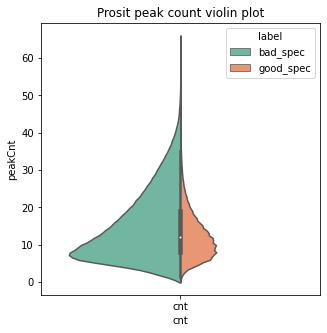

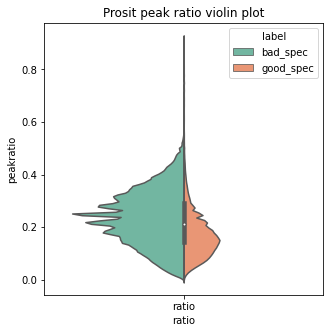

In [459]:
bc, br = spec2qual_thr(df_nid_spec, 0.1)
gc, gr = spec2qual_thr(df_id_spec, 0.1)
qual_viz(bc, br, gc, gr)

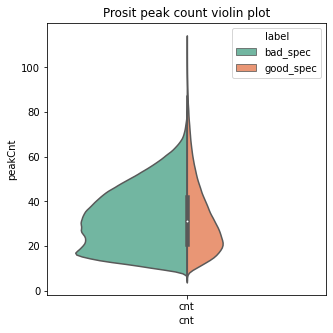

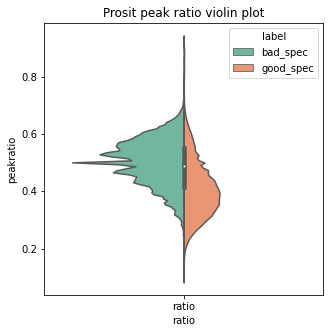

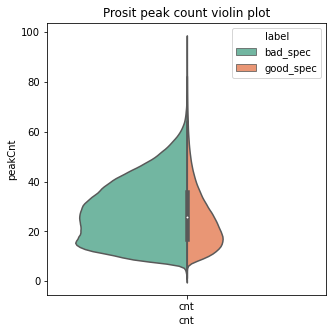

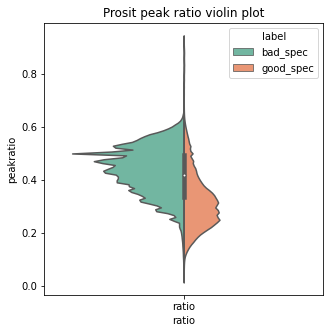

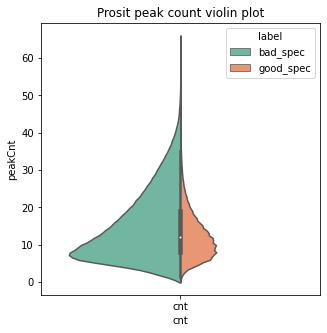

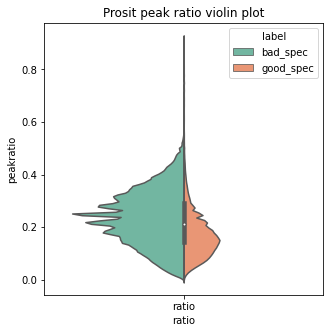

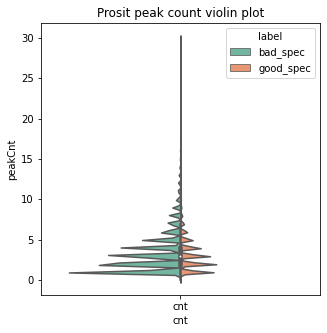

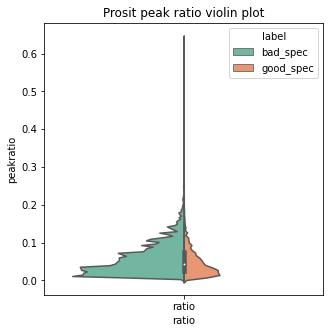

In [460]:
for thr in [0.001, 0.01, 0.1, 0.5]:  # 0.01이 차이가 좀 난다 !!!!
    print(thr)
    bc, br = spec2qual_thr(df_nid_spec, thr)
    gc, gr = spec2qual_thr(df_id_spec, thr)
    qual_viz(bc, br, gc, gr)

0.005


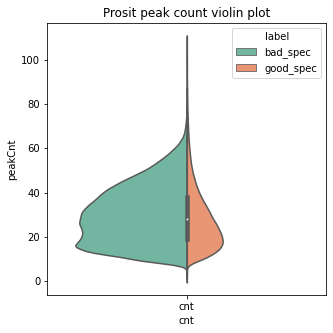

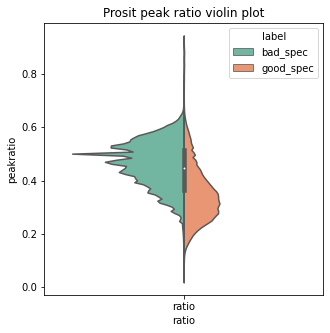

0.01


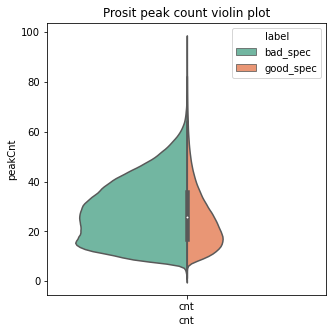

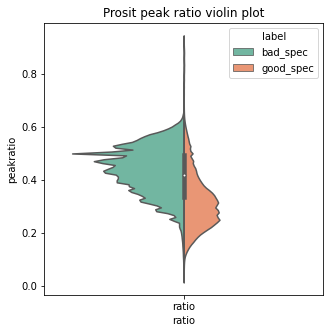

0.015


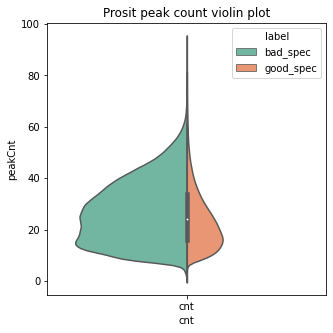

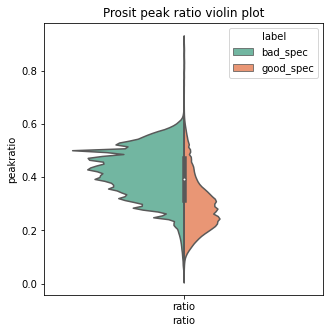

In [461]:
for thr in [0.005, 0.01, 0.015]:
    print(thr)
    bc, br = spec2qual_thr(df_nid_spec, thr)
    gc, gr = spec2qual_thr(df_id_spec, thr)
    qual_viz(bc, br, gc, gr)

0.2


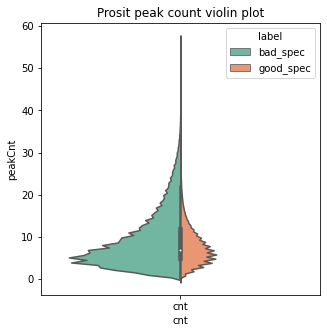

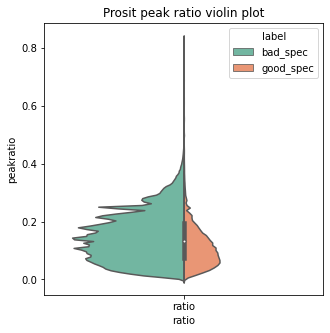

0.3


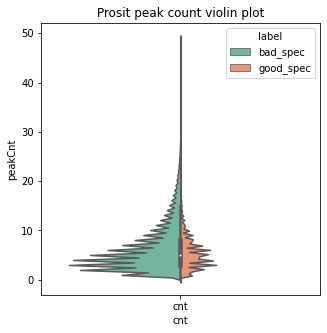

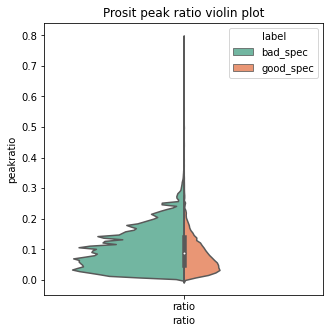

0.4


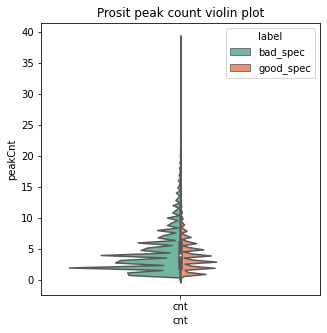

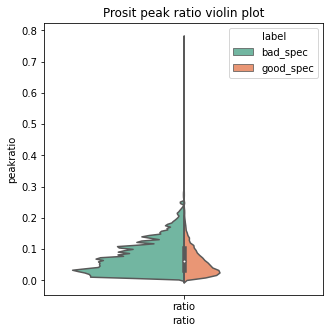

In [462]:
for thr in [0.2, 0.3, 0.4]:
    print(thr)
    bc, br = spec2qual_thr(df_nid_spec, thr)
    gc, gr = spec2qual_thr(df_id_spec, thr)
    qual_viz(bc, br, gc, gr)

# real massIVE-KB vs pred maaIVE-KB

In [172]:
df_id_result.head(2)

,#SpecFile,SpecID,ScanNum,Title,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue,TD
0,massIVE-KB_predMS2_frac01.mgf,index=48780,-1,"48781 File:""massIVE-KB_predMS2_frac48781.mgf"",...",HCD,1148.54220,0,0.000000,3,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",218,213,3.842356e-39,1.063139e-31,0.0,0.0,T
1,massIVE-KB_predMS2_frac01.mgf,index=32978,-1,"32979 File:""massIVE-KB_predMS2_frac32979.mgf"",...",HCD,984.49884,0,0.061996,3,PYFLTDGTGTVTPANASGINDGAAAVVLMK,"sp|Q9BWD1|THIC_HUMAN(pre=K,post=K)",234,234,2.212097e-38,6.120636e-31,0.0,0.0,T


In [195]:
df_idreal_result = pd.read_csv('/data/210827_SJH_prosit/211025STRIP_PEP/real_massIVE-KB_result.tsv', sep='\t')

print(df_idreal_result.shape)
df_idreal_result.head(2)

(749848, 17)


,#SpecFile,SpecID,ScanNum,Title,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue
0,massIVE-KB_frac01.mgf,index=34550,-1,"34551 File:""massIVE-KB_frac34551.mgf"", NativeI...",HCD,687.13104,0,0.088826,5,LQC+57.021PQVDLFYLHAPDHGTPVEETLHAC+57.021QR,"sp|O43488|ARK72_HUMAN(pre=R,post=L);tr|H7C5H7|...",210,210,1.029568e-37,2.834379e-30,0.0,0.0
1,massIVE-KB_frac01.mgf,index=36932,-1,"36933 File:""massIVE-KB_frac36933.mgf"", NativeI...",HCD,709.34720,0,0.086044,5,VIPDWKEQEWDPEKPNAYAGIFHFHFWR,"sp|O15484|CAN5_HUMAN(pre=K,post=F);tr|E7EV01|E...",213,209,1.315382e-37,3.602717e-30,0.0,0.0


In [212]:
df_idreal_result['Peptide'] = df_idreal_result.Peptide.apply(lambda x: x.replace('C+57.021', 'C'))

In [213]:
df_idreal_target = FDR_control(df_idreal_result, 0.01)

********** Target Decoy Labelling Done **********
********** Calculating FDR Done **********


In [214]:
df_idreal_target_removeDecoy = df_idreal_target.copy()
p = []
for prot in df_idreal_target_removeDecoy.Protein.values:
    p.append(';'.join([_ for _ in prot.split(';') if 'XXX' not in _]))
df_idreal_target_removeDecoy['Protein'] = p
df_idreal_target_removeDecoy = df_idreal_target_removeDecoy.loc[df_idreal_target_removeDecoy.Protein!='']

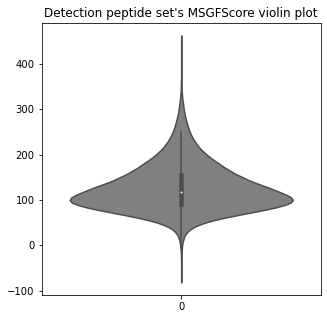

In [215]:
plt.figure(figsize=(5,5))
sns.violinplot(data=df_idreal_target_removeDecoy.MSGFScore.values, color='gray')
plt.title('Detection peptide set\'s MSGFScore violin plot')
plt.show()

In [216]:
df_idreal = pd.DataFrame([[_, 'idreal', 'score'] for _ in df_idreal_target_removeDecoy.MSGFScore.values],
                        columns=['MSGFScore', 'label', 'score'])
df_id = pd.DataFrame([[_, 'ID', 'score'] for _ in df_id_target_removeDecoy.MSGFScore.values],
                     columns=['MSGFScore', 'label', 'score'])

df_MSGFScore = pd.concat([df_idreal, df_id], axis=0).reset_index(drop=True)

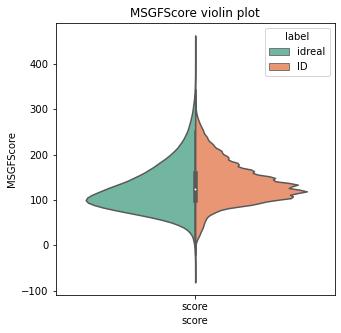

In [217]:
plt.figure(figsize=(5,5))
sns.violinplot(x='score', y="MSGFScore", hue="label",
                    data=df_MSGFScore, 
                    palette="Set2",
                    split=True,
                    scale="count"
                   )
plt.title('MSGFScore violin plot')
plt.show()

In [218]:
df_id_result['TD'] = df_id_result.Protein.apply(isDecoy)
df_idreal_result['TD'] = df_idreal_result.Protein.apply(isDecoy)

df_id_T = df_id_result.loc[df_id_result.TD=='T'].reset_index(drop=True)
df_idreal_T = df_idreal_result.loc[df_idreal_result.TD=='T'].reset_index(drop=True)

In [219]:
print(max(df_id_T.EValue.values), 
      min(df_id_T.EValue.values),  # maaIVE-KB
      max(df_idreal_T.EValue.values), 
      min(df_idreal_T.EValue.values))  # uniprot

127.47247 1.5074339925461614e-33 336.23285 7.06608911968213e-32


In [220]:
df_id_2d_T = pd.DataFrame([[len(p), m, se, e, 'ID', 'score'] 
                               for p, m, se, e in df_id_T[['Peptide', 'MSGFScore', 'SpecEValue', 'EValue']].values],
                        columns=['PeptideLength', 'MSGFScore', 'SpecEValue', 'EValue', 'Label', 'score'])
df_idreal_2d_T = pd.DataFrame([[len(p), m, se, e, 'idreal', 'score'] 
                               for p, m, se, e in df_idreal_T[['Peptide', 'MSGFScore', 'SpecEValue', 'EValue']].values],
                        columns=['PeptideLength', 'MSGFScore', 'SpecEValue', 'EValue', 'Label', 'score'])

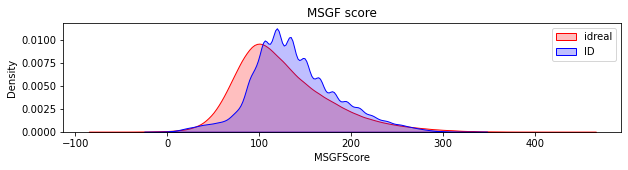

In [221]:
plt.figure(figsize=(10,2))
sns.kdeplot(df_idreal_2d_T.MSGFScore, shade=True, color='red')

sns.kdeplot(df_id_2d_T.MSGFScore, shade=True, color='blue')
plt.legend(['idreal', 'ID'])
plt.title('MSGF score')
plt.show()

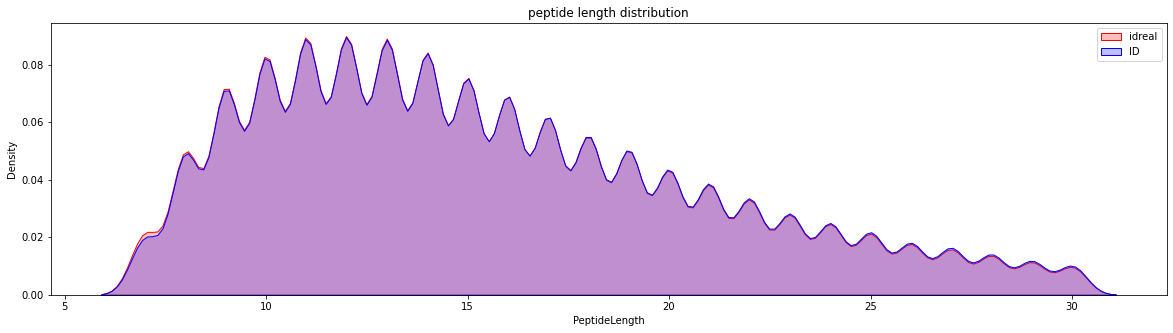

In [222]:
plt.figure(figsize=(20,5))
sns.kdeplot(df_idreal_2d_T.PeptideLength, shade=True, color='red')

sns.kdeplot(df_id_2d_T.PeptideLength, shade=True, color='blue')
plt.legend(['idreal', 'ID'])
plt.title('peptide length distribution')
plt.show()

In [223]:
df_idreal_2d_T['SpecEValue_log'] = df_idreal_2d_T.SpecEValue.apply(lambda x: -math.log(x))
df_id_2d_T['SpecEValue_log'] = df_id_2d_T.SpecEValue.apply(lambda x: -math.log(x))

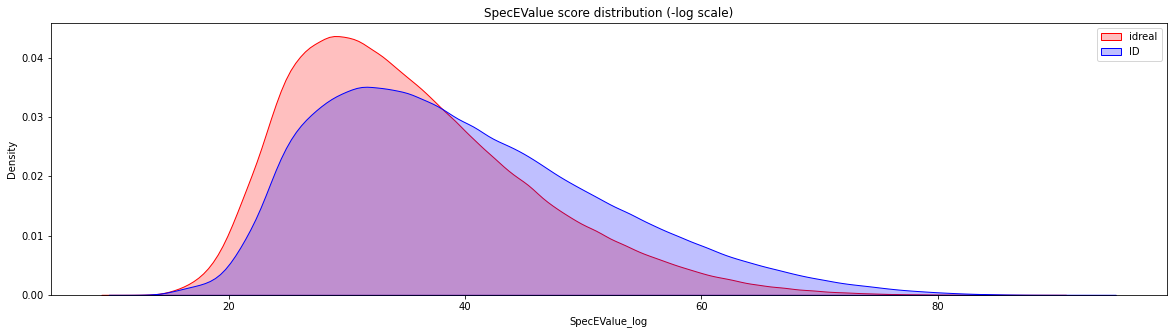

In [224]:
plt.figure(figsize=(20,5))
sns.kdeplot(df_idreal_2d_T.SpecEValue_log, shade=True, color='red')

sns.kdeplot(df_id_2d_T.SpecEValue_log, shade=True, color='blue')
plt.legend(['idreal', 'ID'])
plt.title('SpecEValue score distribution (-log scale)')
plt.show()

In [225]:
df_idreal_2d_T['EValue_log'] = df_idreal_2d_T.EValue.apply(lambda x: -math.log(x))
df_id_2d_T['EValue_log'] = df_id_2d_T.EValue.apply(lambda x: -math.log(x))

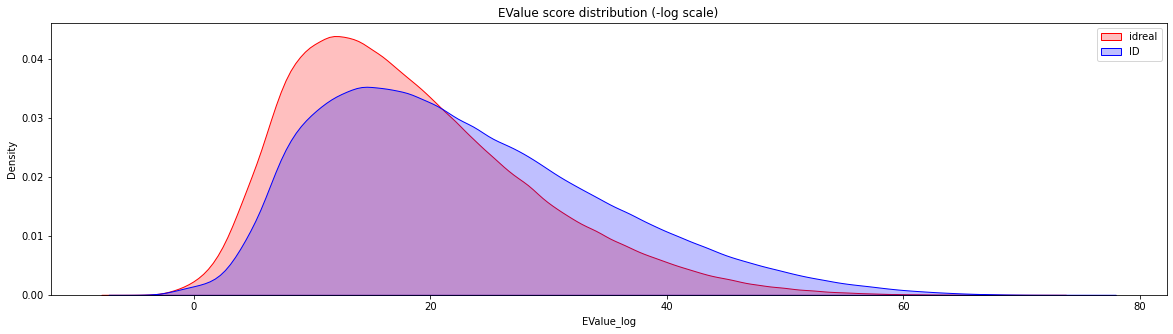

In [226]:
plt.figure(figsize=(20,5))
sns.kdeplot(df_idreal_2d_T.EValue_log, shade=True, color='red')

sns.kdeplot(df_id_2d_T.EValue_log, shade=True, color='blue')
plt.legend(['idreal', 'ID'])
plt.title('EValue score distribution (-log scale)')
plt.show()

In [227]:
print('id min max : ', min(df_id_2d_T.MSGFScore.values), max(df_id_2d_T.MSGFScore.values), 
      '\nnid min max : ', min(df_idreal_2d_T.MSGFScore.values), max(df_idreal_2d_T.MSGFScore.values))

id min max :  -16 339 
nid min max :  -75 456


In [211]:
import pickle

with open('../data/massIVE-KB/211108_stirp_pep2spec.pickle', 'rb') as f:
    pep2spec = pickle.load(f)

In [228]:
df_idreal_T['KEY'] = df_idreal_T.Title.apply(lambda x: x.split()[0]).values

df_id_key = pd.DataFrame([[str(_+1), 
                           ';'.join(list(map(str, dic.keys()))),
                           ';'.join(list(map(str, dic.values()))),
                           p,
                           c,
                           True] for _, ((p, c), dic) in enumerate(pep2spec.items())],
                         columns=['KEY', 'MZ', 'INT', 'PEP', 'CHA', 'DROP'])

df_idreal_spec = df_idreal_T.merge(df_id_key, on='KEY', how='left').drop('DROP', axis=1)

0.005


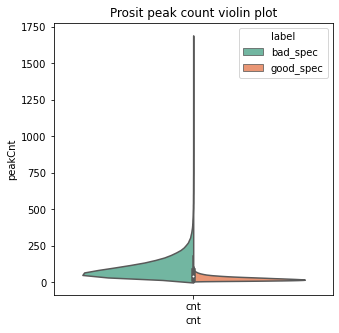

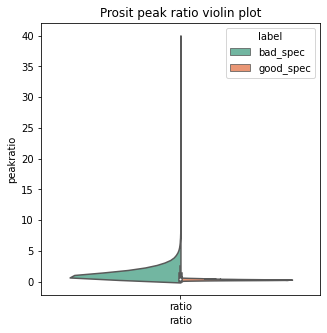

0.01


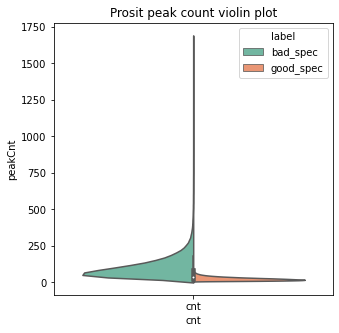

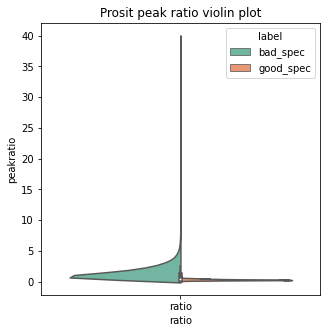

0.015


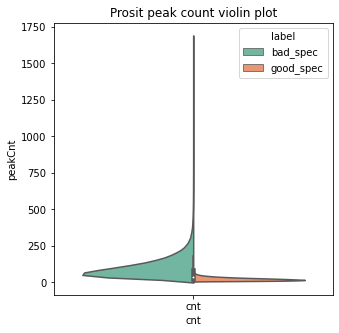

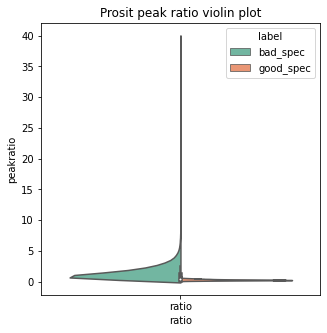

0.1


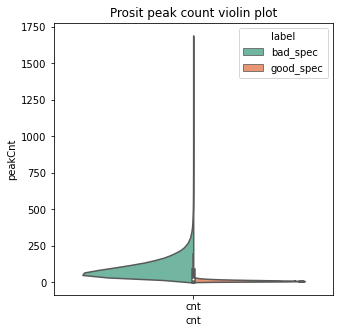

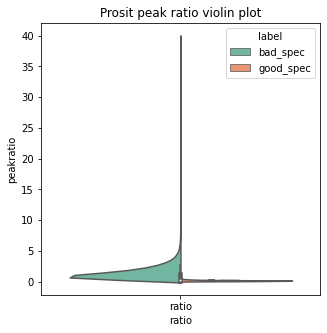

0.3


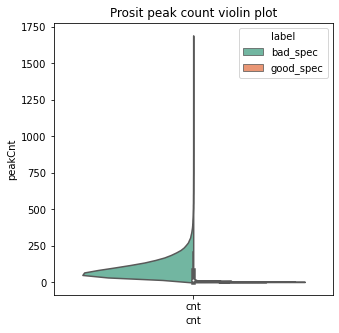

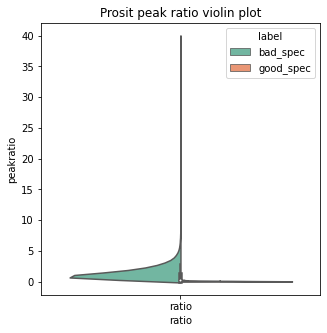

0.5


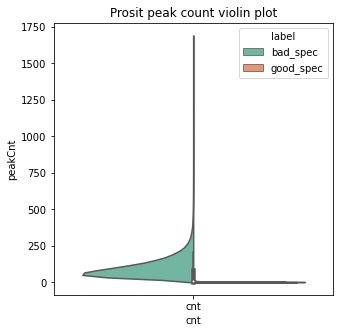

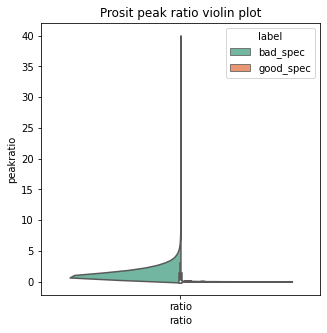

In [463]:
for thr in [0.005, 0.01, 0.015, 0.1, 0.3, 0.5]:
    print(thr)
    bc, br = spec2qual_thr(df_idreal_spec, thr)
    gc, gr = spec2qual_thr(df_id_spec, thr)
    qual_viz(bc, br, gc, gr)

In [236]:
idreal_match_cnt = sum([1 for msgf_p, real_p in df_idreal_spec[['Peptide', 'PEP']].values if msgf_p.replace('L', 'I') == real_p.replace('L', 'I')])

print(idreal_match_cnt)

747134


In [237]:
# mismatch peptide example
for msgf_p, real_p in df_idreal_spec[['Peptide', 'PEP']].values:
    if msgf_p.replace('L', 'I') != real_p.replace('L', 'I'):
        print(msgf_p, real_p)

NVVHQLSVTLEDLYNGATRK NVVHQLSVTLEDLYNGVTKK
KAEELIQQEHADQAEIR QAEELIQQEHADQAEIR
EHALLAYTLGVK ASLSNALDVLGKK
EQIKTLNNKFASFIDK EQIMVLNNKFASFIDK
FAVGTAGLGAEER YAAVVTPGLCAR
AVITCYDTETR ECSIHDNSVLR
TALHLASANGNSEVVKLLLDR TALHLASANGNSEVVQLLLDR
SKPPYTDYVSTRWYR SQPPYTDYVSTRWYR
SSVKYSVQLEDR RYEGNMNIISSK
LSEGFSIHTR TLTSNLNEVR
SDLIKHQR QPSATRLPK
SDLIQHKR QPSATRLPK
VHTGERPYECVECGKSFR VHTGERPYECIDCGKSFR
AMSRLEEELR ATVEREMELR
EEKDFTILQK IEELQHNLQK
SDSDEVPPR DRETMGHR
LTGEVVALK LTGWVLLK
KDTWTPKTKPVCPLK DIKGVSEIVQNGKHFK
DAEYQFRVRAENR AVGSNARMDVTDKYK
YSHFQHLLYR YNHTGQVIIYR
EVELGWGKVLLVK LVELTTSRVTPVR
RFLLDPR FRLLDPR
DPCDPPGRPEAIVITR DPCDPPGRPEAIIVTR
MKLGSSRAGPGR YRVVYYPTR
PILQGFR PLLSASSR
QIRSYPHR EIENQLRR
EKIRDLEK HLPFFLEK
RRREMSSNK HGGLSPQPSQR
IKLYNQK IKLGGFGSK
EWTCSSSPSLPR HADQYKEQMEK
EKIQEAK EKLAWAK
KEIQEAK EKLAWAK
RIHTGEKPYECSDCGKSFIK VGLGTPDSEGFPPRALHNCPYK
SSILHLQEAVR FDTLRFGQLR
MDGDNQSENSQFLLLGISESPEQQR SFLTIHQWTHTGEKPYECNECGK
SSDFLIHPPER LGIHEDSTNRR
HLKVQVGQRVDIPCNAQGTPLPVITWSK LHPYKDFIATLGKLSGLHGQD

SQILSGTLPQDELKELK SQLLSGTLPKDELKELK
GSISIQTEEKIHGK QQEGETRLALVQR
IHTGEKPYRCEECGK IHTGKRPYECEECGK
QIVKDVLEGYNGTIFAYGQTSSGK KIVKDVLEGYNGTIFAYGQTSSGK
KMLSQEKNPPLK KHTTQEEVSILK
PEPPETGVSHLRPEPPK PEPPETGVSRLHPEPPK
IEEAKRELDSIEAELTR ELEAQLDDAVAEASKERK
EDLPVNTSK LGLGEGAEEK
LVEDGMHALGAMR GDPAHAGLAELGHR
TGTQPLGVQGLTEEQR SATQFTGRYHYLGGR
DMKRLEEKDKERKNVK TPACRSPGPSPPIAVALEVK
LHGGMEQEER RFEQEMMSK
NLERLRK NLEVGIRK
GEKGLPGFPGLPGK GLEGERPARLTR
ELEIEERERR LIELCRSPSER
AAELSIK AAETVLK
KKLPVDSVFNKFEDEDSDDVPRKRK QFLEEINKWTVQYNVSPLSWNVAVK
ARCDGKESLLQDRRQEEDQR GNPPHSAPCVPNGSALLLSNPAYR
LRYEDLVR FVDVTEVVR
KQIRHKPEGK RVAGVIVPPEGK
QRERVLK RNAVEVLK
INSSAIK LNSASLK
DREKEREREKEREKEKERGK CLQLGSPGPGPVAAGPGPASVSGLAAGSGR
SPSPYYSR DRPYDYK
TILMSPK DVIAFPK
LYGKALSRLISFRRHMRMHTGER LQSLQRLFEPTTPAPPLRPPDSLSR
VETQEVNPGASR LPHGSYTPTGTR
MFLQNTCKRNVFLPSR LFSGYDSSVRPAREVGDR
SDQLKNEQDK DAEENKKEDK
RRFPEEPHVPLEQR GVPTPSGDRGPGAARPAAR
QQFDDAKYR SHLQWQESR
RCQYEPDYR REYDQCFNR
KDPNQVELWGLK KLVDCHRELEK
QWQSPSPDLHPTIYHAK DVQMLQDAISKMDPTDA

STAAEVQQVLNR GNNILLTTEGGVK
SEKERIEAQNKPFDAK SEKERIEAQNQPFDAK
RQFIFDVVNEGGEKEK RQFIFDVVNEGGEQEK
QLEAQDHTIR EIEAQDHTIR
TAESSGGPSTSR NSAESEGMRR
RIHTGEKPYTCEECGKAFSR RIHTGEKPYTCEECGQAFSR
AFNQSSNLTEHKKIHPGEK AFNQSSALIQHQRIHTGEK
IHTGEKPYKCQQCDR IHTGEKPYKCNQCER
IHTGEKPFECKECRK IHTGEKPYQCIECRK
SIVLNEYK SLVLGGTYR
IHTGEKPYRCNECGK IHTGEKPYECNQCGR
IHTGEKPYECNRCGK IHTGEKPYECNQCGR
QWSGSPPICAPMK INFACSYPLDMK
VSGSGGGGAGK VGELCAGK
QRTLELQAR QEKLEQLAR
LTWLASER TLWALSER
LQSESTNNGKNKR KLTDTSERPSWR
LANEETIK LESHLYR
MDREVNQLK SWNGSVEILK
AFNSSSILTEHK FSVFYRNHHK
KMIEFIGWK SFRVSSDLIK
WLVQVPR GELARVPR
KEEMEEEKK KEENGTMGVSK
YFQGLGPPPK EGGKPPTPPPK
SSTGSPTSPLNAEK AVSAGRDSDPSWK
PLTRAEVGEKTEERR EPIQTVVEQDEDIKK
AMLPRLVSNSGLKRPSCLDLPK PVDLAPVEAPGPLAPVPSTVCPLR
EYLEFRR EYIERFR
IYFQLHR YIFQLHR
DPRYQEVDSFTNLIPNR VSQSTSSLVDTSVSATSRPR
WRPERLLRRQRAGGRPSRPHPAR VIVDANNLTVEIENELNIIHKFIR
DLILTPKCVYVIGREKVK NGQLLQVPVAALVVGDIAQVK
KGPGGGAPVR GLGSPTVHK
AFSQSSYLIIHQR AFSQSSNFLRHQK
AFSQSAYLIEHQR AFSQSSNFLRHQK
VRSPPPLCR VPEPQRSLR
EKENL

FEQLSESAKEELINFK FEKISESAKQELIDFK
SQDVMDLTEGDNEASASAPPAAK SEDVMDLTEGDNEASASAPPAAK
LANPLYTEWILEAIQK LANPLYTEWILEAIKK
NQELGAVSLDGYFHLWK NKELGAVSLDGYFHLWK
NLINQMLTINPAK DLINKMLTINPAK
NQELGAVSLDGYFHLWK NKELGAVSLDGYFHLWK
ISEHDQCEWR DMSSDLERDHR
QKFQAPVCGFPCNHR QQFQAPVCGFPCNHR
KQAPPNTDWRFSQAQR QQAPPNTDWRFSQAQR
LDGFPPGRPSPDNLNQICLPNR SASTEATHEIHYIPSVLLGPQAR
YGKDATNVGDEGGFAPNILENKEGLELLK YGKDATNVGDEGGFAPNILENNEALELLK
IISKIENHEGVR ISLQDHLDKAKK
IIGEESGSHRPK EITVRGHNCPK
LLELDPEHQR LIELDQYLDK
TALHLASANGNSEVVKLLLDRR TALHLASANGNSEVVQLLLDRR
THTGEKPFECSQCGK THTGERPYGCNECGK
QLTPLPPSAPTSADDNIKTPAER QLTPLPPSAPPSADDNIKTTAER
SVLFVCLGK AVIFDRFR
PYEYRECGK PYECREYGK
KKYDKYGEK EQDRLLQEK
LKKCGTYTK NQDRPQLTK
MKKLDEEALLKK LEAQTRPFDLKK
ELQELLKEK EIVRDIKEK
EPMMATVCVQQLLK MPEHSTLMKDFRR
AHEEPPGLLAPPAR AHTSPAPAPRPTPR
VDEEYQNPHTVDRVPMGK VDEEYKNPHTVDRVPMGK
ESIVSQLSR DTLVSQLSR
KSDNHSPAVVTTTVSSKK VPTHTLAMVVPPQEPDR
RIDQLNR RLDGALNR
KMEELKK FIEELKK
RIREDYPQKEILR RIPPPGSQPPVLNTSR
MVRRDRLR MVEARLARR
VTAYLDWIR VTAYKAVQEK
ILEVHI

In [241]:
pd.options.display.max_columns=30

In [250]:
# x = pred
df_id_spec_x = df_id_spec[['Precursor', 'IsotopeError', 'PrecursorError(ppm)', 'Peptide', 'Protein', 'MSGFScore', 'SpecEValue', 'EValue', 'MZ', 'INT', 'PEP', 'CHA']]
df_id_spec_x.rename({'Precursor':'Precursor_pred', 'IsotopeError':'IsotopeError_pred',
                    'PrecursorError(ppm)': 'PrecursorError(ppm)_pred', 'Peptide':'Peptide_pred', 'Protein':'Protein_pred',
                    'MSGFScore':'MSGFScore_pred', 'SpecEValue':'SpecEValue_pred', 'EValue':'EValue_pred',
                    'MZ':'MZ_pred', 'INT':'INT_pred'}, axis=1, inplace=True)

In [251]:
# y = real
df_idreal_spec_y = df_idreal_spec[['Precursor', 'IsotopeError', 'PrecursorError(ppm)', 'Peptide', 'Protein', 'MSGFScore', 'SpecEValue', 'EValue', 'MZ', 'INT', 'PEP', 'CHA']]
df_idreal_spec_y.rename({'Precursor':'Precursor_real', 'IsotopeError':'IsotopeError_real',
                    'PrecursorError(ppm)': 'PrecursorError(ppm)_real', 'Peptide':'Peptide_real', 'Protein':'Protein_real',
                    'MSGFScore':'MSGFScore_real', 'SpecEValue':'SpecEValue_real', 'EValue':'EValue_real',
                    'MZ':'MZ_real', 'INT':'INT_real'}, axis=1, inplace=True)

In [256]:
df_id_real_pred = df_id_spec_x.merge(df_idreal_spec_y, on=['PEP', 'CHA'], how='inner')

In [258]:
df_idreal_spec_y.shape

(748655, 12)

In [257]:
print(df_id_real_pred.shape)
df_id_real_pred.head(2)

(747703, 22)


,Precursor_pred,IsotopeError_pred,PrecursorError(ppm)_pred,Peptide_pred,Protein_pred,MSGFScore_pred,SpecEValue_pred,EValue_pred,MZ_pred,INT_pred,PEP,CHA,Precursor_real,IsotopeError_real,PrecursorError(ppm)_real,Peptide_real,Protein_real,MSGFScore_real,SpecEValue_real,EValue_real,MZ_real,INT_real
0,1148.54220,0,0.000000,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",213,3.842356e-39,1.063139e-31,147.112804167;294.18121816699994;441.249632166...,0.24706785;0.4907155;0.21187675;0.36394352;0.4...,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,3,1148.54220,0,0.000000,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",79,2.073257e-16,5.736481e-09,120.08077239990234;126.05509185791016;129.1025...,23000.103515625;14412.4521484375;16642.2246093...
1,984.49884,0,0.061996,PYFLTDGTGTVTPANASGINDGAAAVVLMK,"sp|Q9BWD1|THIC_HUMAN(pre=K,post=K)",234,2.212097e-38,6.120636e-31,147.112804167;278.15328916699997;391.237353167...,0.19555475;0.3118106;0.42195186;0.52578694;0.2...,PYFLTDGTGTVTPANASGINDGAAAVVLMK,3,984.49884,0,0.061996,PYFLTDGTGTVTPANASGINDGAAAVVLMK,"sp|Q9BWD1|THIC_HUMAN(pre=K,post=K)",212,8.474427e-31,2.344784e-23,120.08137512207031;129.1028594970703;130.08676...,21733.4375;22421.587890625;23938.779296875;607...


In [262]:
idxes = []
for idx, (predp, p, realp) in zip(df_id_real_pred.index, df_id_real_pred[['Peptide_pred', 'PEP', 'Peptide_real']].values):
    if predp == p and realp==p:
        idxes.append(idx)

In [263]:
print(len(idxes))

744033


In [264]:
df_id_real_pred = df_id_real_pred.loc[idxes].reset_index(drop=True)

In [266]:
df_id_real_pred.to_csv('211108Mon_prosit_noise.csv', index=False)